In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from node2vec import Node2Vec
import numpy as np


In [2]:
inventories = pd.read_csv('inventories.csv')
inventory_parts = pd.read_csv('inventory_parts.csv')
inventory_sets = pd.read_csv('inventory_sets.csv')
part_categories = pd.read_csv('part_categories.csv')
parts = pd.read_csv('parts.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')
colors = pd.read_csv('colors.csv')

print(inventories.columns)
print(inventory_parts.columns)
print(inventory_sets.columns)
print(part_categories.columns)
print(sets.columns)
print(themes.columns)
print(colors.columns)

Index(['id', 'version', 'set_num'], dtype='object')
Index(['inventory_id', 'part_num', 'color_id', 'quantity', 'is_spare'], dtype='object')
Index(['inventory_id', 'set_num', 'quantity'], dtype='object')
Index(['id', 'name'], dtype='object')
Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')
Index(['id', 'name', 'parent_id'], dtype='object')
Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')


In [3]:
inventories

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1
...,...,...,...
11676,18593,1,31066-1
11677,18645,1,71018-7
11678,18701,1,71018-17
11679,18704,1,60159-1


In [4]:
inventory_parts

,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,f
1,1,48395,7,1,f
2,1,mcsport6,25,1,f
3,1,paddle,0,1,f
4,3,11816pr0005,78,1,f
...,...,...,...,...,...
580246,18708,99206,0,3,f
580247,18708,99207,71,4,f
580248,18708,99780,15,4,f
580249,18708,99780,0,9,f


In [16]:
inventory_sets

,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1
...,...,...,...
2841,18701,71018-5,1
2842,18701,71018-6,1
2843,18701,71018-7,1
2844,18701,71018-8,1


In [17]:
part_categories

,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special
5,6,Bricks Wedged
6,7,Containers
7,8,Technic Bricks
8,9,Plates Special
9,10,Tiles Printed


In [18]:
parts

,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1
...,...,...,...
25988,zbb013,Znap Connector 3 x 3 - 4 way B (Beam),43
25989,zbb014,Znap Connector 1 x 3 - 2 way A,43
25990,zbb015,"Znap Beam 3, 1 Hole",43
25991,zbb018,Znap Connector 3 x 3 - 4 way C (Closed),43


In [19]:
sets

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28


In [20]:
themes

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
609,610,Brickheadz,NaN
610,611,Series 17 Minifigures,535.0
611,612,Star Wars Episode 8,158.0
612,613,Freemakers,158.0


In [10]:
colors

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [11]:
# Function to create a graph for a single set
def create_set_graph(set_num, set_data):
    G = nx.Graph()
    
    # Filter parts for the given set
    set_parts_data = set_data[set_data['set_num'] == set_num]
    
    # Skip if no parts (empty set)
    if set_parts_data.empty or set_parts_data['part_num'].isnull().all():
        return None
    
    # Add nodes for each part with metadata
    for _, row in set_parts_data.iterrows():
        part_num = row['part_num']
        G.add_node(part_num,
                   name=row['name_part'],
                   category=row['name_cat'],
                   color=row['name'],  # Color name from colors table
                   quantity=row['quantity'],
                   is_spare=row['is_spare'])
    
    # Add edges between all pairs of parts, with weights based on shared attributes
    part_list = set_parts_data[['part_num', 'name_cat', 'name']].drop_duplicates()
    part_to_category = dict(zip(part_list['part_num'], part_list['name_cat']))
    part_to_color = dict(zip(part_list['part_num'], part_list['name']))
    
    for part1, part2 in combinations(G.nodes, 2):
        # Calculate edge weight based on shared attributes
        weight = 0
        if part_to_category.get(part1) == part_to_category.get(part2):
            weight += 1  # Same category
        if part_to_color.get(part1) == part_to_color.get(part2):
            weight += 0.5  # Same color
        G.add_edge(part1, part2, weight=max(weight, 0.1))  # Minimum weight for connectivity
    
    return G

# Feature extraction for classification
def extract_graph_features(G):
    features = {
        'num_parts': G.number_of_nodes(),
        'num_edges': G.number_of_edges(),
        'avg_degree': sum(dict(G.degree()).values()) / G.number_of_nodes() if G.number_of_nodes() > 0 else 0,
        'density': nx.density(G),
        'avg_edge_weight': sum(d['weight'] for _, _, d in G.edges(data=True)) / G.number_of_edges() if G.number_of_edges() > 0 else 0
    }
    return features

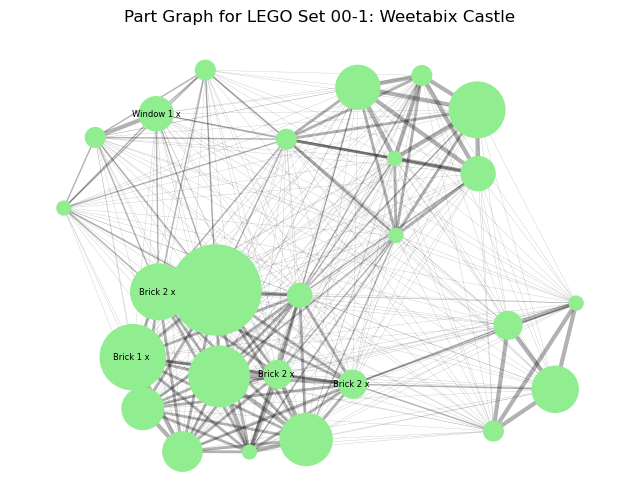


Set 00-1 Graph Metadata:
Part 29c01: {'name': 'Window 1 x 1 x 2 with Glass', 'category': 'Windows and Doors', 'color': 'White', 'quantity': 6.0, 'is_spare': 'f'}
Part 3001a: {'name': 'Brick 2 x 4 without Cross Supports', 'category': 'Bricks', 'color': 'Blue', 'quantity': 4.0, 'is_spare': 'f'}
Part 3002a: {'name': 'Brick 2 x 3 without Cross Supports', 'category': 'Bricks', 'color': 'White', 'quantity': 16.0, 'is_spare': 'f'}
Is graph for set 00-1 connected? True


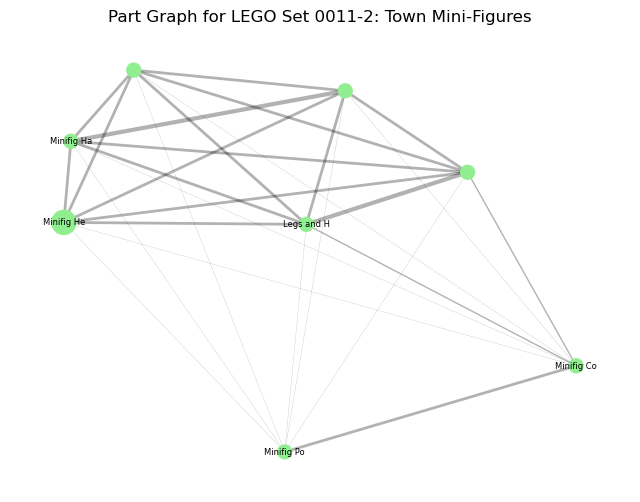


Set 0011-2 Graph Metadata:
Part 3624: {'name': 'Minifig Police Style Cap', 'category': 'Minifig Accessories', 'color': 'White', 'quantity': 1.0, 'is_spare': 'f'}
Part 3625: {'name': 'Minifig Hair Female with Pigtails', 'category': 'Minifigs', 'color': 'Black', 'quantity': 1.0, 'is_spare': 'f'}
Part 3626apr0001: {'name': 'Minifig Head Standard Grin Print [Solid Stud]', 'category': 'Minifigs', 'color': 'Yellow', 'quantity': 3.0, 'is_spare': 'f'}
Is graph for set 0011-2 connected? True


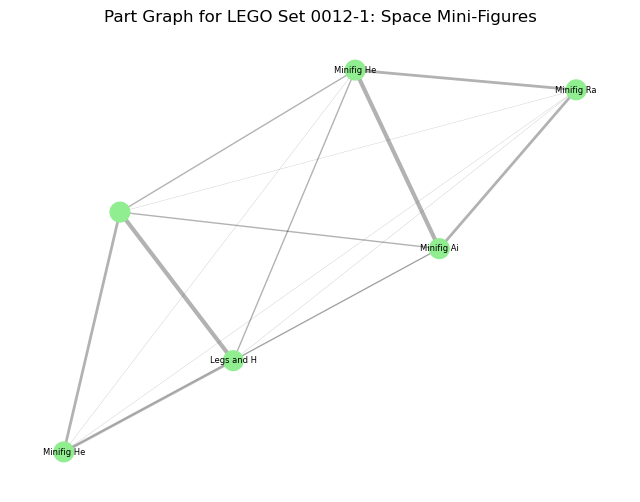


Set 0012-1 Graph Metadata:
Part 3626apr0001: {'name': 'Minifig Head Standard Grin Print [Solid Stud]', 'category': 'Minifigs', 'color': 'Yellow', 'quantity': 2.0, 'is_spare': 'f'}
Part 3838: {'name': 'Minifig Airtanks', 'category': 'Minifig Accessories', 'color': 'Red', 'quantity': 2.0, 'is_spare': 'f'}
Part 3842a: {'name': 'Minifig Helmet Classic with Thin Chin Guard and Visor Dimples', 'category': 'Minifig Accessories', 'color': 'Red', 'quantity': 2.0, 'is_spare': 'f'}
Is graph for set 0012-1 connected? True


In [12]:
# Assuming datasets: sets, themes, inventories, inventory_parts, parts, part_categories, colors
# Merge datasets to get set metadata
sets_themes = sets.merge(themes, left_on='theme_id', right_on='id', suffixes=('_set', '_theme'))
sets_themes = sets_themes.rename(columns={'id': 'theme_id_actual'})

# Link inventories to sets (use latest version)
inventories = inventories.sort_values('version').drop_duplicates('set_num', keep='last')
sets_inventories = sets_themes.merge(inventories, on='set_num', how='left')

# Merge with inventory_parts to get part details
set_parts = sets_inventories.merge(inventory_parts, left_on='id', right_on='inventory_id', how='left')
set_parts = set_parts.merge(parts, on='part_num', how='left')
set_parts = set_parts.merge(part_categories, left_on='part_cat_id', right_on='id', suffixes=('_part', '_cat'))
set_parts = set_parts.merge(colors, left_on='color_id', right_on='id', suffixes=('_part', '_color'))

# Filter out sets with no part data
valid_sets = set_parts[set_parts['part_num'].notnull()]['set_num'].unique()
set_parts = set_parts[set_parts['set_num'].isin(valid_sets)]
sets_inventories = sets_inventories[sets_inventories['set_num'].isin(valid_sets)]

# Create and visualize graphs for a few valid sets
sample_sets = sets_inventories['set_num'].head(3).tolist()
for set_num in sample_sets:
    set_graph = create_set_graph(set_num, set_parts)
    
    if set_graph is None:
        print(f"\nSet {set_num} has no part data, skipping visualization.")
        continue
    
    # Visualize the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(set_graph, k=0.3, iterations=20)
    
    # Draw nodes (size based on part quantity)
    node_sizes = [set_graph.nodes[part].get('quantity', 1) * 100 for part in set_graph.nodes]
    nx.draw_networkx_nodes(set_graph, pos, node_size=node_sizes, node_color='lightgreen')
    
    # Draw edges (thicker for higher weights)
    edge_weights = [set_graph[part1][part2]['weight'] for part1, part2 in set_graph.edges]
    nx.draw_networkx_edges(set_graph, pos, width=[w * 2 for w in edge_weights], alpha=0.3)
    
    # Add labels for a few nodes
    labels = {node: set_graph.nodes[node]['name'][:10] for node in list(set_graph.nodes)[:5]}
    nx.draw_networkx_labels(set_graph, pos, labels, font_size=6)
    
    set_name = sets_inventories[sets_inventories['set_num'] == set_num]['name_set'].iloc[0]
    plt.title(f"Part Graph for LEGO Set {set_num}: {set_name}")
    plt.axis('off')
    plt.show()
    
    # Print sample node metadata
    print(f"\nSet {set_num} Graph Metadata:")
    for node in list(set_graph.nodes)[:3]:
        print(f"Part {node}: {set_graph.nodes[node]}")
    
    # Check if graph is connected
    is_connected = nx.is_connected(set_graph)
    print(f"Is graph for set {set_num} connected? {is_connected}")

In [13]:
# Extract features for all valid sets
set_features = []
set_graphs = []
for set_num in valid_sets:
    set_graph = create_set_graph(set_num, set_parts)
    if set_graph is None:
        continue
    set_graphs.append(set_graph)
    features = extract_graph_features(set_graph)
    features['set_num'] = set_num
    set_features.append(features)

features_df = pd.DataFrame(set_features)
print("\nSample Features for Classification:")
print(features_df.head())


Sample Features for Classification:
   num_parts  num_edges  avg_degree  density  avg_edge_weight set_num
0         26        325        25.0      1.0         0.410769    00-1
1          8         28         7.0      1.0         0.678571  0011-2
2          6         15         5.0      1.0         0.633333  0012-1
3          6         15         5.0      1.0         0.633333  0013-1
4          6         15         5.0      1.0         0.753333  0014-1


In [15]:
len(set_graphs)

10713

In [21]:
def get_node2vec_embeddings(graph, dimensions=32, walk_length=30, num_walks=200, p=1, q=1):
    if graph.number_of_nodes() == 0:
        return {}
    
    try:
        node2vec = Node2Vec(
            graph,
            dimensions=dimensions,
            walk_length=walk_length,
            num_walks=num_walks,
            p=p,
            q=q,
            workers=1,
            quiet=True
        )
        model = node2vec.fit(window=10, min_count=1, batch_words=4)
        embeddings = {node: model.wv[str(node)] for node in graph.nodes}
        return embeddings
    except Exception as e:
        print(f"Error generating embeddings: {e}")
        return {}

In [24]:
# Step 3: Aggregate embeddings per set
embedding_dim = 32
set_embeddings = []
for set_num, set_graph in zip(valid_sets, set_graphs):
    embeddings = get_node2vec_embeddings(set_graph, dimensions=embedding_dim)
    if not embeddings:
        mean_embedding = np.zeros(embedding_dim)
    else:
        mean_embedding = np.mean([emb for emb in embeddings.values()], axis=0)
    
    embedding_record = {'set_num': set_num}
    for i, val in enumerate(mean_embedding):
        embedding_record[f'emb_{i}'] = val
    set_embeddings.append(embedding_record)

# Convert to DataFrame
embeddings_df = pd.DataFrame(set_embeddings)

# Step 4: Merge with features_df
features_df = features_df.merge(embeddings_df, on='set_num', how='left')
print("\nUpdated Features with Node2Vec Embeddings:")
print(features_df.head())

# Save for classification
features_df.to_csv('lego_set_features_with_node2vec.csv', index=False)

KeyboardInterrupt: 